In [3]:
import pandas as pd

# Đọc tập dữ liệu từ file cadata.txt với mã hóa latin1
data = pd.read_csv('cadata.txt', header=None, delim_whitespace=True, encoding='latin1')

# Đặt tên cho các cột
column_names = [
    'Median House Value', 'Median Income', 'Housing Median Age', 
    'Total Rooms', 'Total Bedrooms', 'Population', 'Households', 
    'Latitude', 'Longitude'
]
data.columns = column_names

# Hiển thị 5 dòng dữ liệu đầu tiên
print(data)

       Median House Value  Median Income  Housing Median Age  Total Rooms  \
0                452600.0         8.3252                41.0        880.0   
1                358500.0         8.3014                21.0       7099.0   
2                352100.0         7.2574                52.0       1467.0   
3                341300.0         5.6431                52.0       1274.0   
4                342200.0         3.8462                52.0       1627.0   
...                   ...            ...                 ...          ...   
20635             78100.0         1.5603                25.0       1665.0   
20636             77100.0         2.5568                18.0        697.0   
20637             92300.0         1.7000                17.0       2254.0   
20638             84700.0         1.8672                18.0       1860.0   
20639             89400.0         2.3886                16.0       2785.0   

       Total Bedrooms  Population  Households  Latitude  Longitude  
0     

In [13]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 6)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [7]:
from sklearn.svm import SVR
svr = SVR().fit(X_train_scaler, Y_train)

In [8]:
from sklearn.metrics import mean_absolute_error
y_pred = svr.predict(X_test_scaler)
mean_absolute_error(Y_test, y_pred)

87953.58144138938

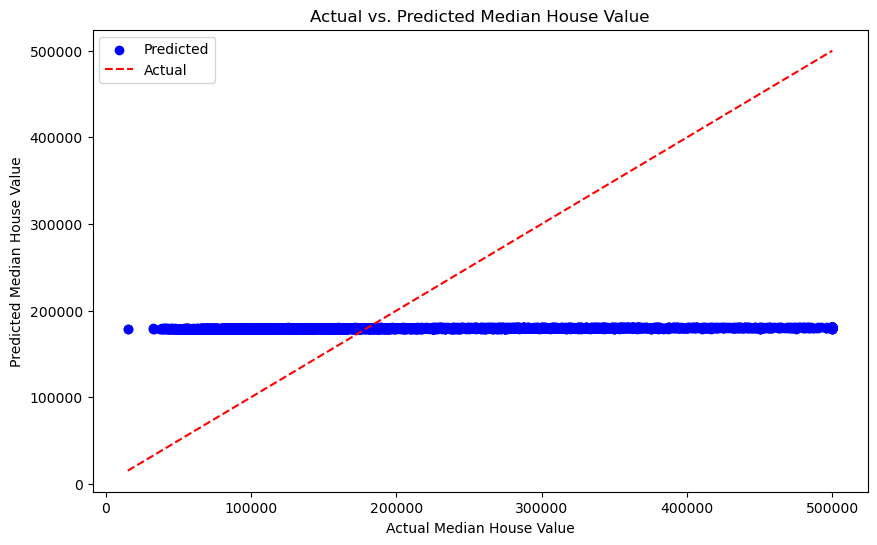

In [9]:
import matplotlib.pyplot as plt

# Trực quan hóa kết quả dự đoán và giá trị thực tế trên tập kiểm tra
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Value')
plt.legend()
plt.show()